In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

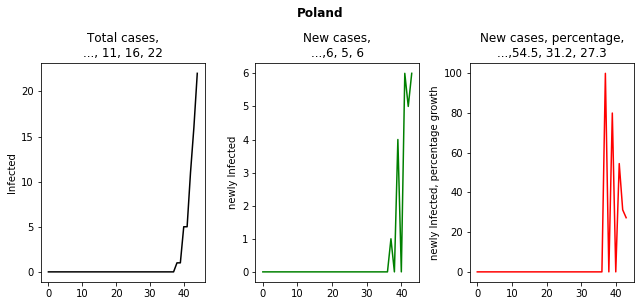

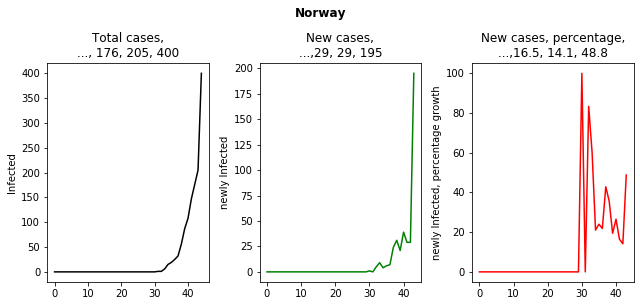

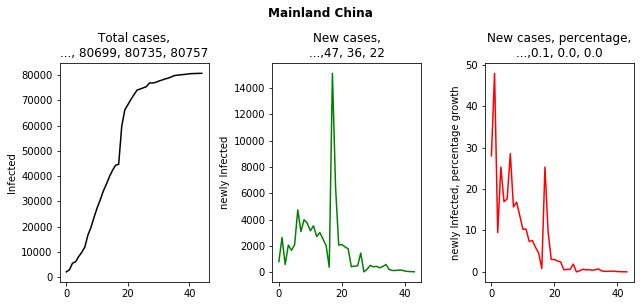

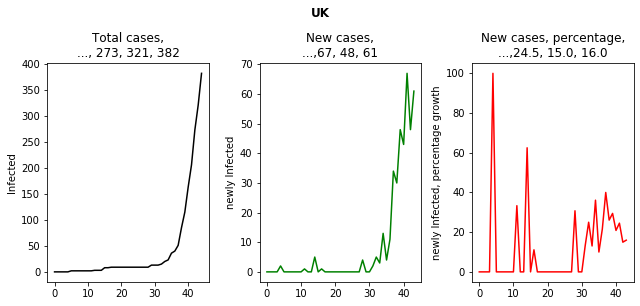

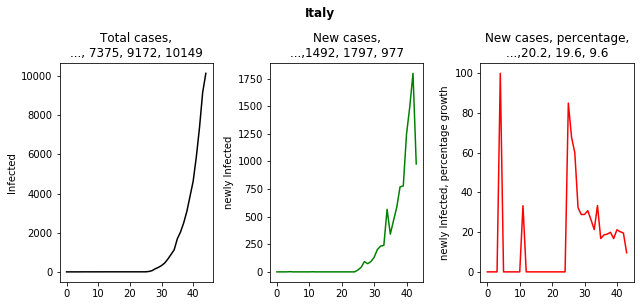

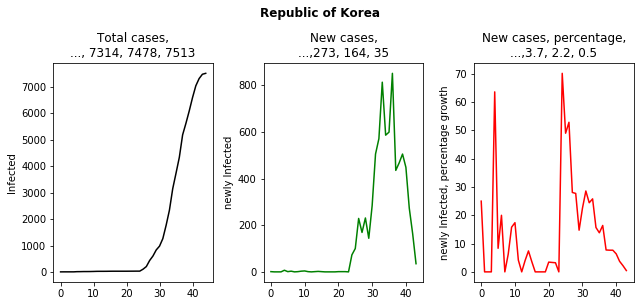

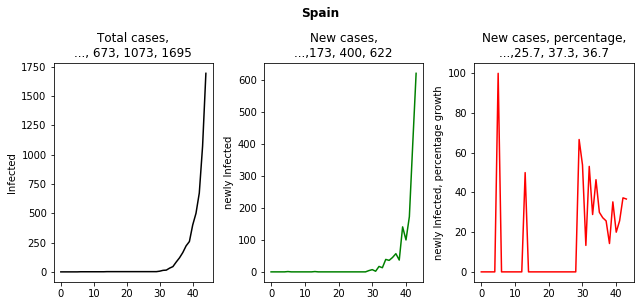

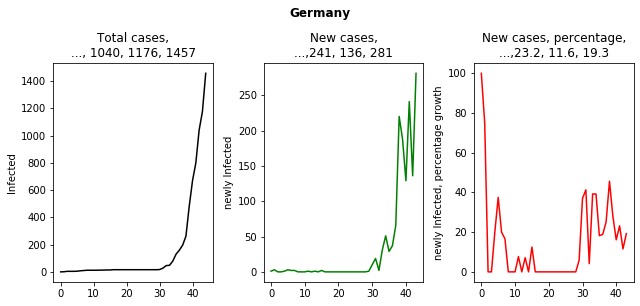

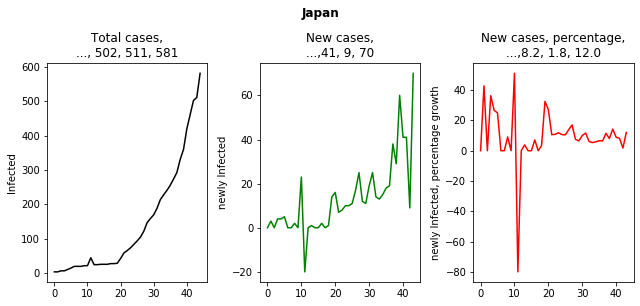

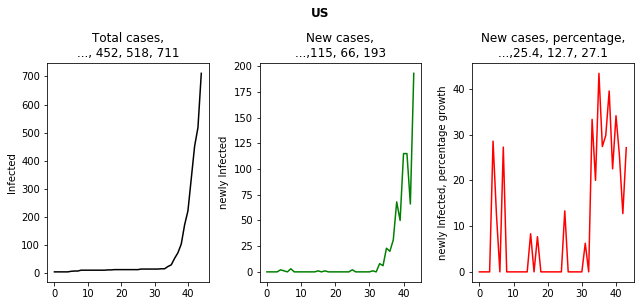

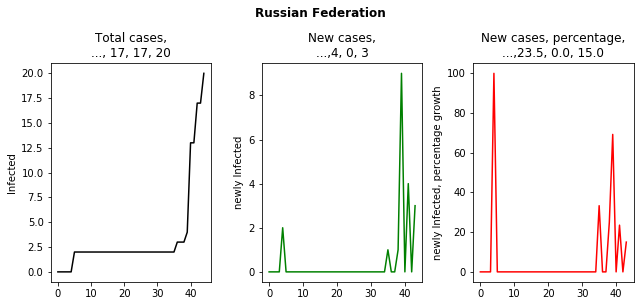

In [188]:
my_countries = ["Poland", "Norway", "Mainland China","UK", "Italy","Republic of Korea", "Spain", "Germany","Japan", "US", "Russian Federation"]

for country in my_countries:
    df_temp = df[df['Country/Region'] == country]
    
    if country == "US":
        df_temp = df_temp[df_temp['Province/State'].str.contains(",") == True] 
    
    df_temp = df_temp.to_numpy()
       
    df_temp = np.sum(df_temp[:,4:],axis=0)
    df_temp = df_temp[np.newaxis,:]


    
    fig, axs = plt.subplots(1, 3, figsize=(9, 4))

    plt.suptitle(f'{country}\n', y=1.05, weight="bold")  
    axs[0].set_title(f"Total cases,\n..., {df_temp[0,-3]}, {df_temp[0,-2]}, {df_temp[0,-1]}")
    axs[0].set_ylabel(f"Infected")
    axs[0].plot(df_temp[0,4:],c="black")
    
    
    
    axs[1].set_title(f"New cases,\n...,{np.diff(df_temp[0,4:],1)[-3]}, {np.diff(df_temp[0,4:],1)[-2]}, {np.diff(df_temp[0,4:],1)[-1]}")
    axs[1].set_ylabel("newly Infected")
    axs[1].plot(np.diff(df_temp[0,4:],1),c="green")
    
    b = df_temp[0,5:]
    a = np.diff(df_temp[0,4:],1)
    c = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    c = c*100
    
    axs[2].set_title(f"New cases, percentage,\n...,{np.round(c[-3],1)}, {np.round(c[-2],1)}, {np.round(c[-1],1)}")
    axs[2].plot(c,c="red")
    axs[2].set_ylabel("newly Infected, percentage growth")
    
    plt.tight_layout()
    plt.show()

In [190]:

pd.set_option('display.max_rows', 1000)

df_temp = df[df['Country/Region']=="US"]

In [191]:
df_temp = df_temp[df_temp['Province/State'].str.contains(",") == True] 

In [192]:
df_temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
33,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,9,14,21,31,51,58,71,83,83,116
34,"Cook County, IL",US,41.7377,-87.6976,0,0,1,1,1,1,...,3,4,4,4,5,5,6,7,7,11
40,"Los Angeles, CA",US,34.0522,-118.2437,0,0,0,0,1,1,...,1,1,1,7,11,13,14,14,14,20
56,"San Benito, CA",US,36.5761,-120.9876,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
59,"San Diego County, CA",US,32.7157,-117.1611,0,0,0,0,0,0,...,2,2,2,2,3,3,3,3,3,3
63,"Humboldt County, CA",US,40.7450,-123.8695,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
64,"Sacramento County, CA",US,38.4747,-121.3542,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,10
97,"Snohomish County, WA",US,48.0330,-121.8339,0,0,0,0,0,0,...,2,4,6,8,18,19,27,31,31,37
111,"Grafton County, NH",US,43.9088,-71.8260,0,0,0,0,0,0,...,0,1,2,2,2,2,2,3,3,3
112,"Hillsborough, FL",US,27.9904,-82.3018,0,0,0,0,0,0,...,0,1,2,2,2,2,2,2,2,2
